# **Heart Failure Clustering**

### By **Hari Calzi** & **Salvatore Ferrara**

---

In [ ]:
pip install ucimlrepo matplotlib scikit-learn seaborn numpy pandas

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

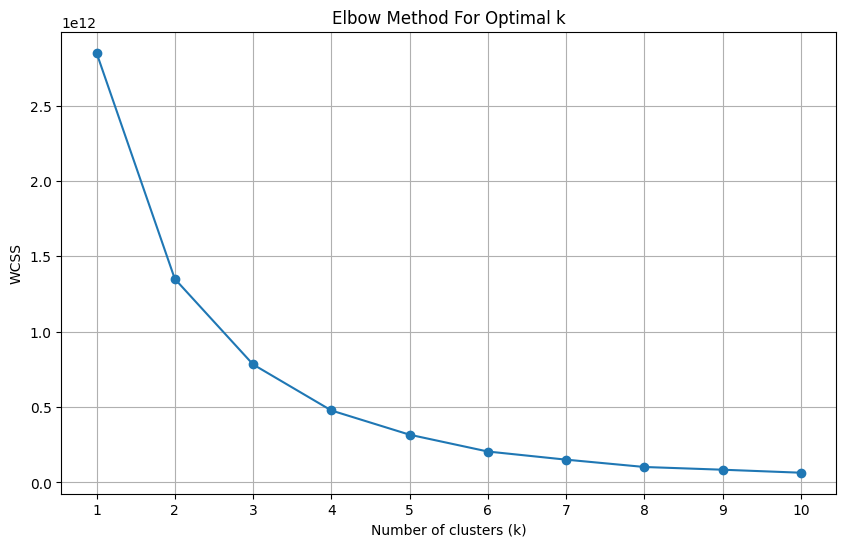

In [3]:
# elbow method to find optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Within Cluster Sum of Squares
# find the value of k where the decrease in WCSS starts to slow down (the "elbow")
wcss = []

# range of k to test
k_range = range(1, 11)

# calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()


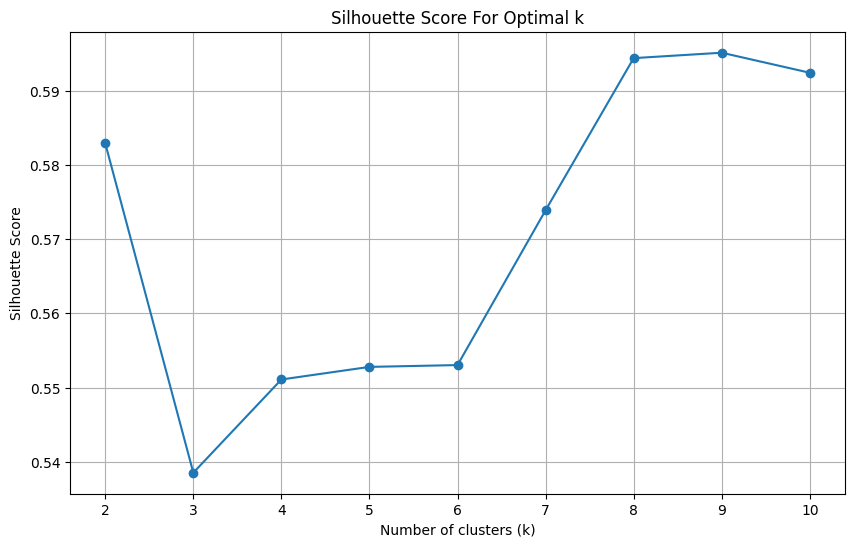

In [4]:
# silhouette score to validate optimal number of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []

# range of k to test
k_range = range(2, 11)

# calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=300)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    #print(f'For n_clusters = {k}, silhouette score is {score}')

# plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


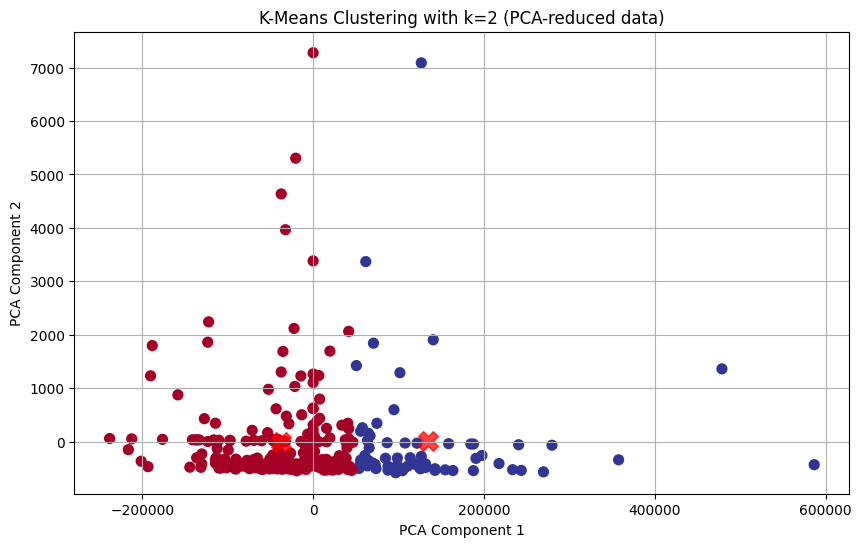

In [5]:

# applying k-means with k=2 and plot clusters after reducing to 2D with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto', max_iter=300)
y_kmeans = kmeans.fit_predict(X)

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with k=2 (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

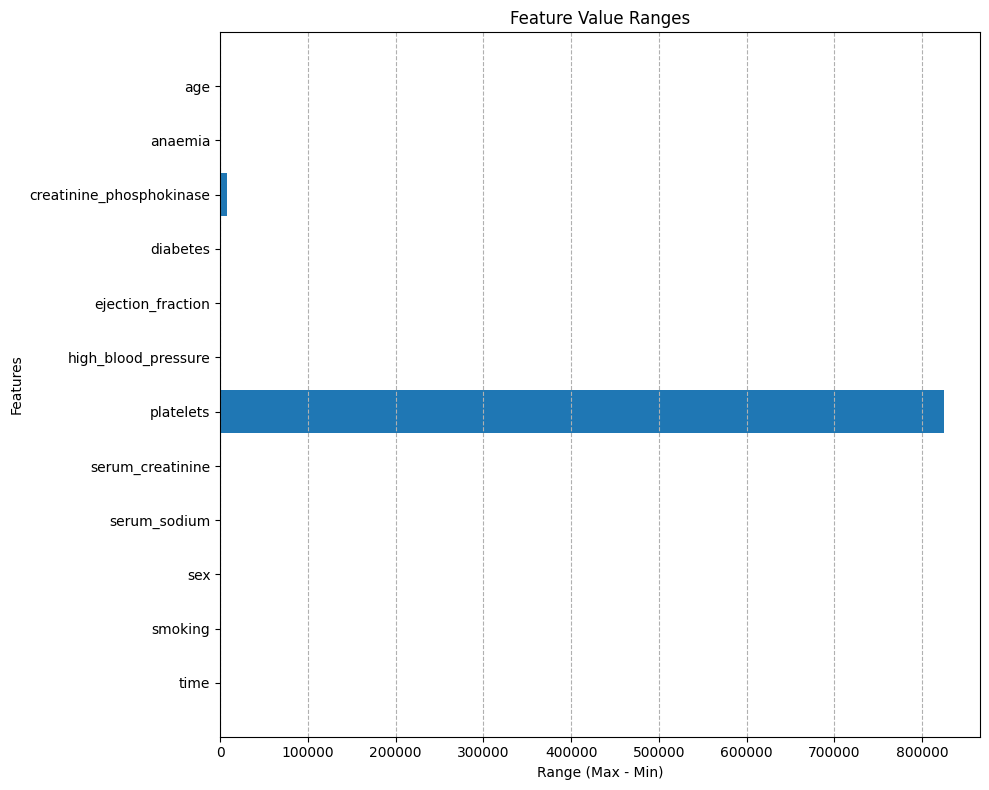

In [6]:
# plot feature range of values with bar plot

# calculate range for each feature with max - min
feature_ranges = X.max() - X.min()

features = feature_ranges.index.tolist()
ranges = feature_ranges.values

plt.figure(figsize=(10, 8))
plt.barh(features, ranges) 

plt.title('Feature Value Ranges')
plt.xlabel('Range (Max - Min)')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--')
plt.tight_layout() 
plt.show()


## Features are too unbalanced as some are continuous and others are boolean

## Solution: scale values

In [7]:
# scaling features before clustering with StandardScaler
from sklearn.preprocessing import StandardScaler

# we keep a copy of original data 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
X_original = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

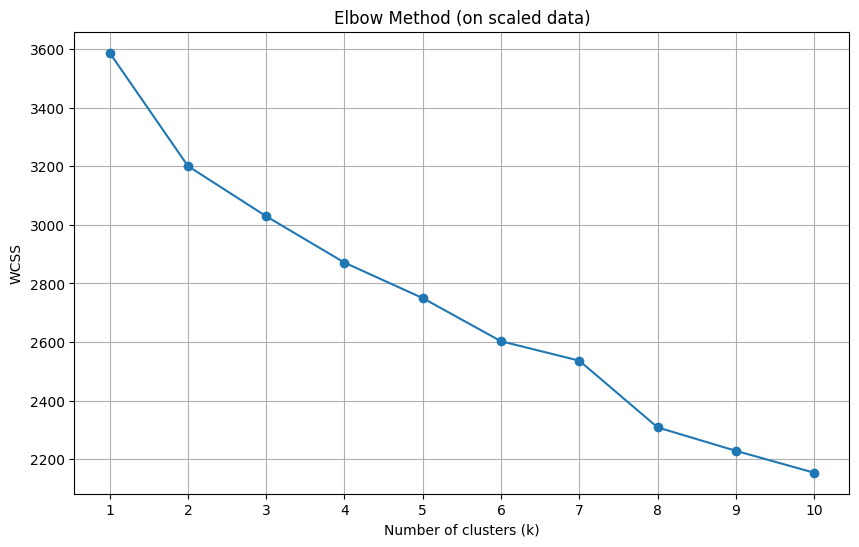

In [8]:
# elbow method on scaled data to find optimal number of clusters

# Within Cluster Sum of Squares
# find the value of k where the decrease in WCSS starts to slow down (the "elbow")
wcss = []
k_range = range(1, 11)

# calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (on scaled data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

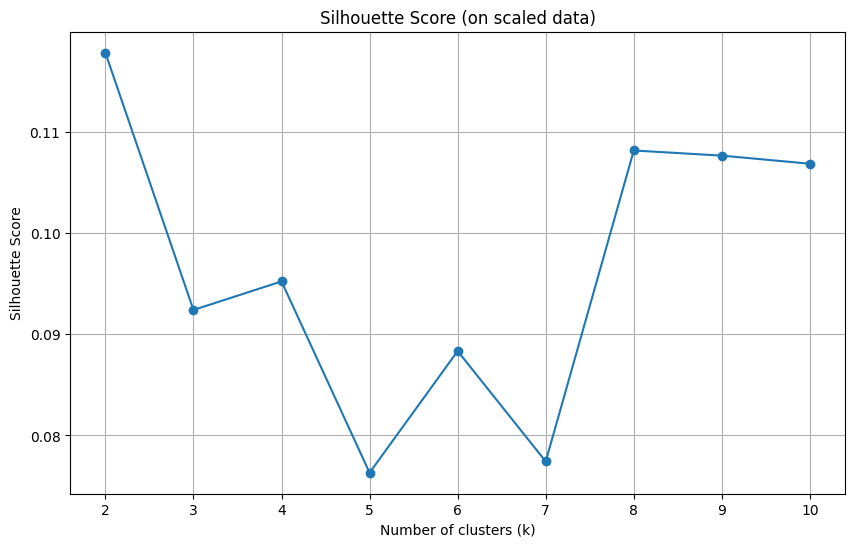

In [9]:
# silhouette score on scaled data to validate optimal number of clusters
silhouette_scores = []
k_range = range(2, 11) 

# calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    #print(f'For k = {k}, Silhouette Score is : {score:.4f}')

# plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score (on scaled data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

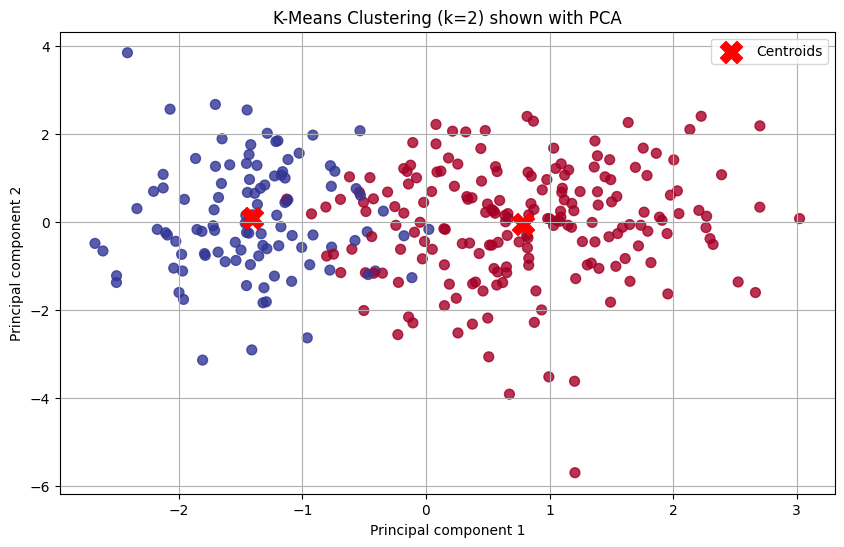

In [10]:
# applying k-means with optimal k on SCALED data and plot clusters after reducing to 2D with PCA
from sklearn.decomposition import PCA

OPTIMAL_K = 2 

# dimensionality reduction on SCALED data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# apply K-Means on SCALED data
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X_scaled)

# show clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='RdYlBu', alpha=0.8)
centers_scaled = kmeans.cluster_centers_
centers_pca = pca.transform(centers_scaled)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={OPTIMAL_K}) shown with PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid(True)
plt.show()

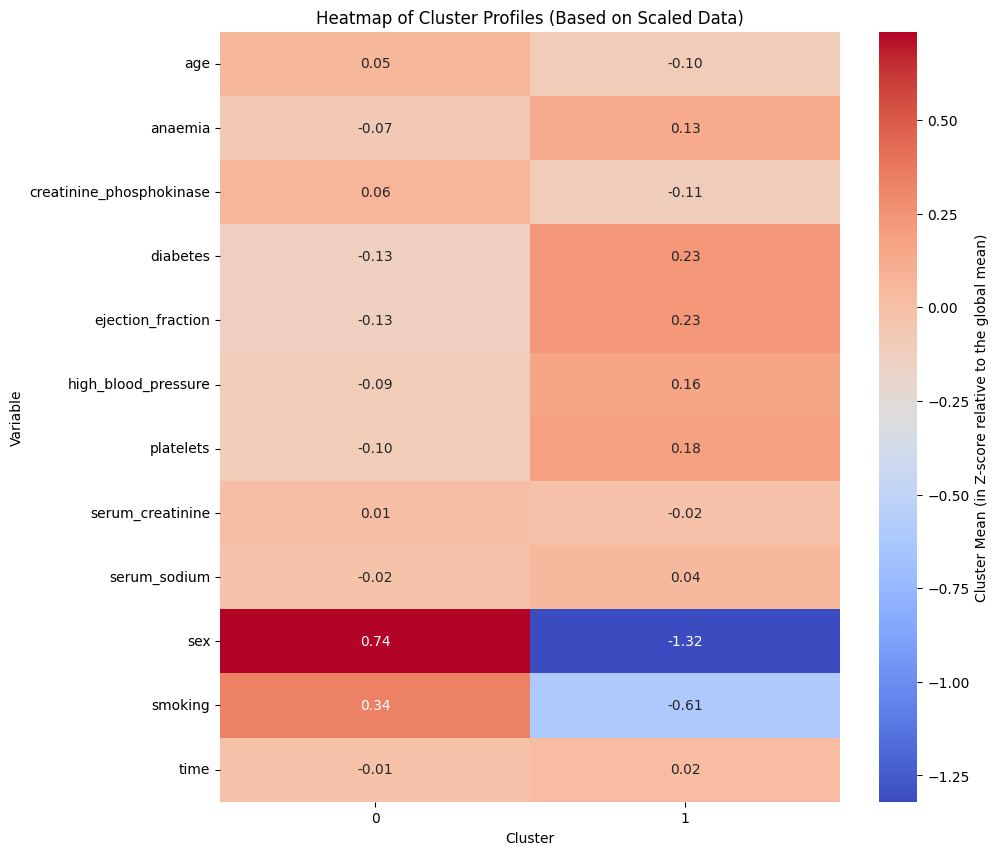

In [11]:
# plot heatmap of cluster profiles based on SCALED data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_analysi_scaled = pd.DataFrame(X_scaled, columns=X_original.columns)
X_analysi_scaled['cluster'] = y_kmeans

# compute the means for each cluster using the SCALED values, the resulting means directly represent the Z-score profiles
scaled_means = X_analysi_scaled.groupby('cluster').mean()

# generate the Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(
    scaled_means.T, 
    annot=True,       
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={'label': 'Cluster Mean (in Z-score relative to the global mean)'}
)
plt.title('Heatmap of Cluster Profiles (Based on Scaled Data)')
plt.ylabel('Variable')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

## Cluster 0 is characterized mainly by smokers men
## Cluster 1 is characterized mainly by non-smokers women 

In [12]:
# add cluster labels to original dataframe
X['cluster'] = y_kmeans

In [13]:
# Detailed statistics for each cluster
groups= X_analysi_scaled.groupby('cluster')

# distinguish between continuous and binary variables
for name, group in groups:
    print(f"Cluster {name}:")
    # for continuous variables show mean, std, median
    print(group.agg({
            'age': ['mean', 'std', 'median'],
            'creatinine_phosphokinase': ['mean', 'std', 'median'],
            'ejection_fraction': ['mean', 'std', 'median'],
            'platelets': ['mean', 'std', 'median'],
            'serum_creatinine': ['mean', 'std', 'median'],
            'serum_sodium': ['mean', 'std', 'median'],
            'time': ['mean', 'std', 'median'],
            
        }))
    # for binary variables, mean represent the proportions, count shows total count in cluster
    print(group.agg({
            'anaemia': ['mean', 'count'], 
            'diabetes': ['mean', 'count'],
            'high_blood_pressure': ['mean', 'count'],
            'sex': ['mean', 'count'],
            'smoking': ['mean', 'count'],
        }))

Cluster 0:
             age  creatinine_phosphokinase  ejection_fraction  platelets  \
mean    0.053755                  0.063548          -0.129625  -0.101238   
std     1.029721                  1.155911           0.926383   0.967349   
median -0.070223                 -0.343607          -0.260991  -0.111204   

        serum_creatinine  serum_sodium      time  
mean            0.010162     -0.023742 -0.011903  
std             0.961252      0.941292  1.006757  
median         -0.284552      0.085034 -0.164690  
          anaemia    diabetes  high_blood_pressure         sex     smoking
mean    -0.071889   -0.129538            -0.091925    0.735688    0.338618
count  192.000000  192.000000           192.000000  192.000000  192.000000
Cluster 1:
             age  creatinine_phosphokinase  ejection_fraction  platelets  \
mean   -0.096457                 -0.114030           0.232599   0.181661   
std     0.946332                  0.626705           1.090576   1.040546   
median -0.070223

In [14]:
# differentiate variable types for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# continuous variables (to be visualized with Boxplots)
continuous_vars = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

# binary variables (to be visualized with Bar Plots of proportions)
binary_vars = [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'
]

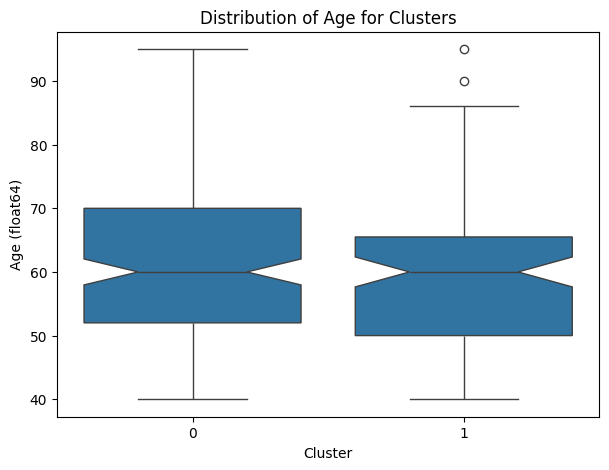

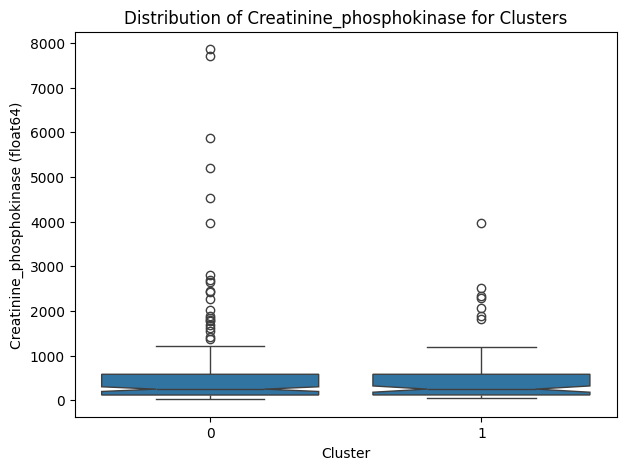

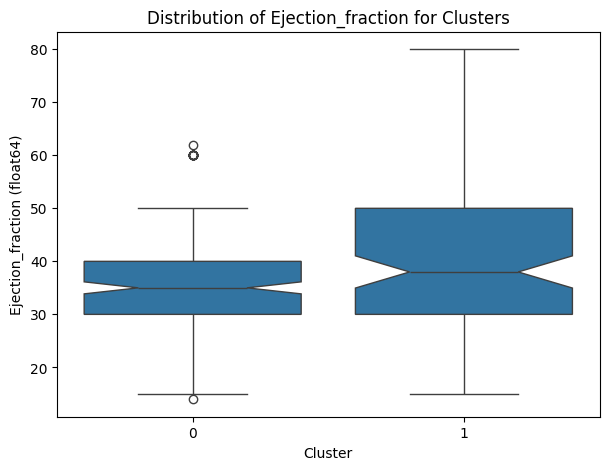

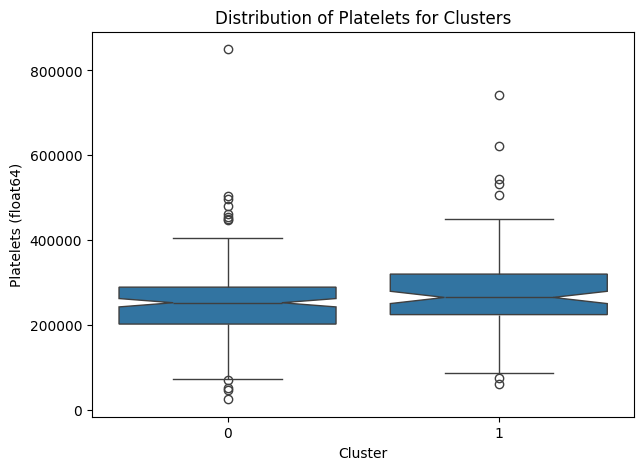

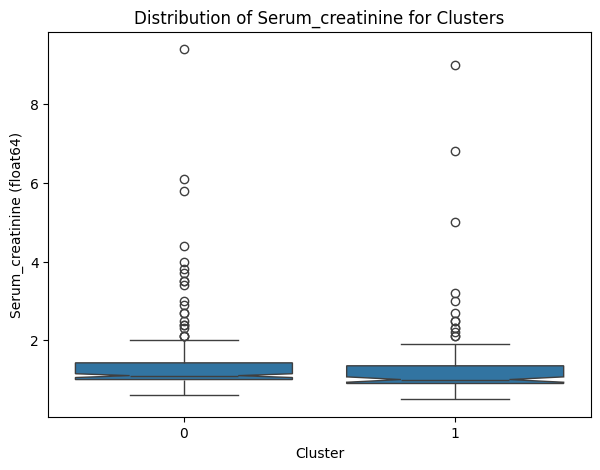

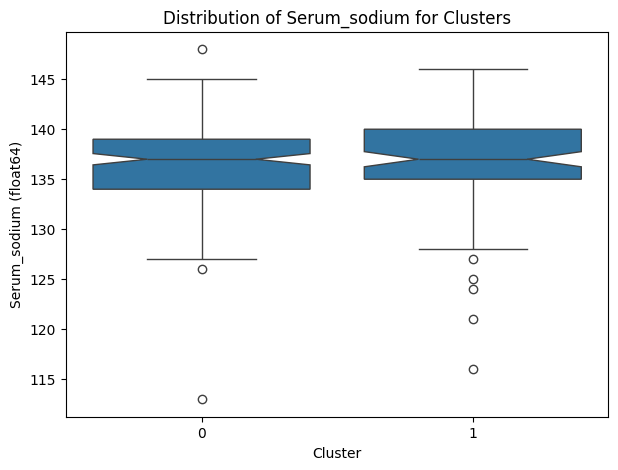

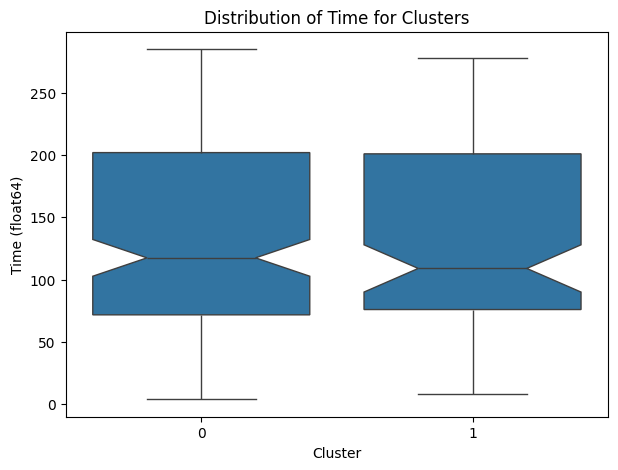

In [15]:
# Boxplots for continuous variables
for col in continuous_vars:
    plt.figure(figsize=(7, 5))
    # plotting using original data to reflect actual distributions
    sns.boxplot(x='cluster', y=col, data=X, notch=True)
    plt.title(f'Distribution of {col.capitalize()} for Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'{col.capitalize()} ({X_analysi_scaled[col].dtype})')
    plt.show()

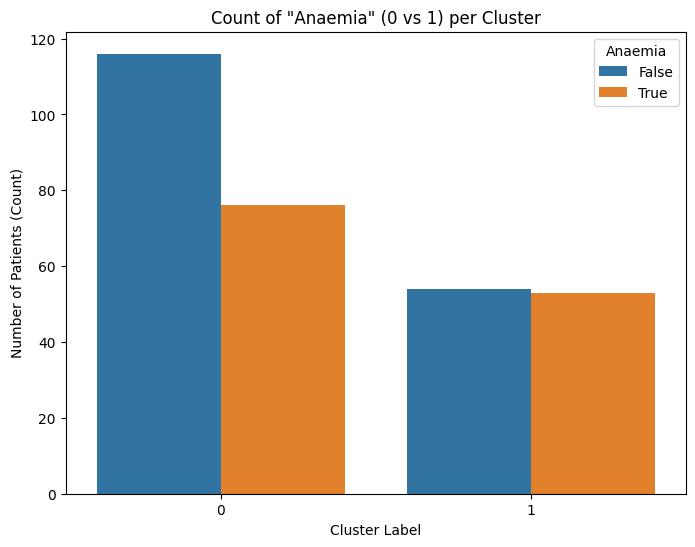

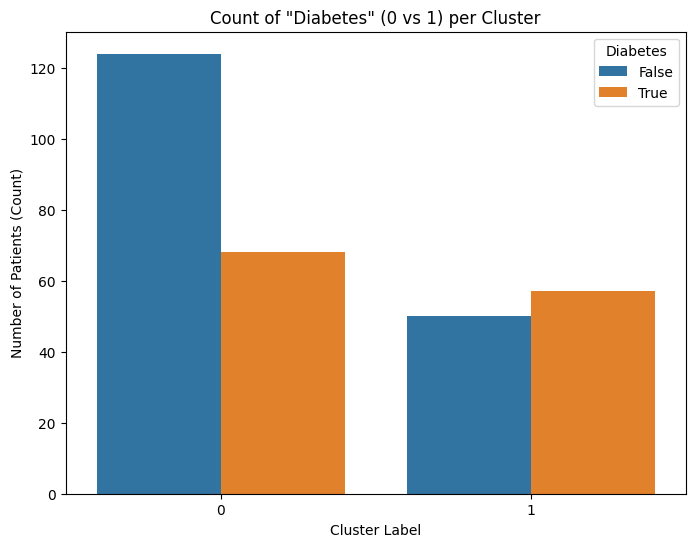

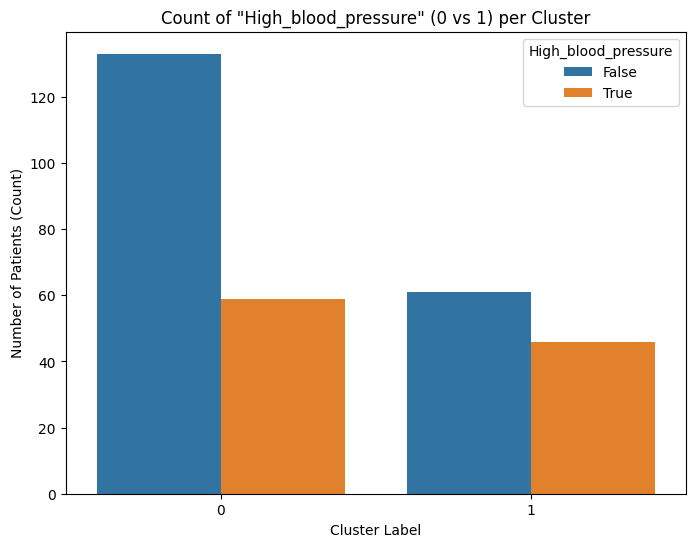

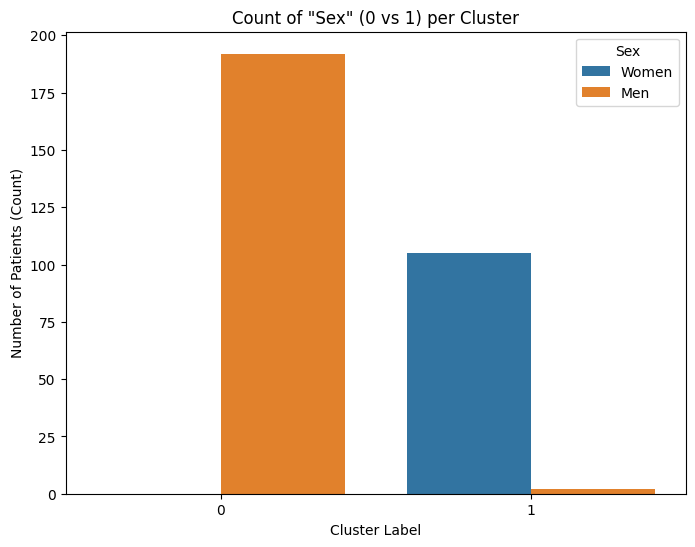

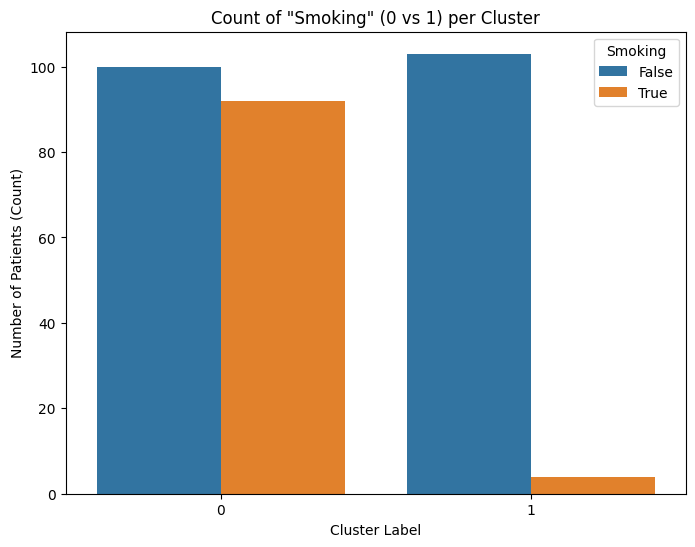

In [16]:
# Bar Plots for binary variables, showing counts for 0 and 1 values in each cluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for col in binary_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X, x='cluster', hue=col)
    plt.title(f'Count of "{col.capitalize()}" (0 vs 1) per Cluster')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Patients (Count)')
    if col == "sex":
        plt.legend(title=col.capitalize(), labels=['Women', 'Men'])
    else:
        plt.legend(title=col.capitalize(), labels=['False', 'True'])
    
    plt.show()

## The original dataset is not well balanced and is not properly representative of the real population

In [17]:
# Statistical tests to compare clusters (Cluster 0 vs Cluster 1), using Kruskal-Wallis for continuous variables and Chi-squared for binary variables

import pandas as pd
from scipy import stats

cluster_0 = X[X['cluster'] == 0]
cluster_1 = X[X['cluster'] == 1]
alpha = 0.05
results_list = []

# Kruskal-Wallis for continuous variables
for var in continuous_vars:
    stat_kw, p_value_kw = stats.kruskal(cluster_0[var], cluster_1[var])
    results_list.append({
        'Feature': var,
        'Test': 'Kruskal-Wallis',
        'P-Value': p_value_kw,
        'Significant (p < 0.05)': 'Yes' if p_value_kw < alpha else 'No'
    })

# Chi-squared test for binary variables
for var in binary_vars:
    contingency_table = pd.crosstab(X['cluster'], X[var])
    if contingency_table.shape == (2, 2):
        chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)
    else:
        p_value_chi2 = 1.0

    results_list.append({
        'Feature': var,
        'Test': 'Chi-squared',
        'P-Value': p_value_chi2,
        'Significant (p < 0.05)': 'Yes' if p_value_chi2 < alpha else 'No'
    })

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='P-Value')

def format_pvalue(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"{p:.4f}"
results_df['P-Value'] = results_df['P-Value'].apply(format_pvalue)
results_df

,Feature,Test,P-Value,Significant (p < 0.05)
10,sex,Chi-squared,< 0.001,Yes
11,smoking,Chi-squared,< 0.001,Yes
8,diabetes,Chi-squared,0.0040,Yes
3,platelets,Kruskal-Wallis,0.0084,Yes
2,ejection_fraction,Kruskal-Wallis,0.0090,Yes
9,high_blood_pressure,Chi-squared,0.0452,Yes
7,anaemia,Chi-squared,0.1227,No
5,serum_sodium,Kruskal-Wallis,0.1590,No
4,serum_creatinine,Kruskal-Wallis,0.2646,No
0,age,Kruskal-Wallis,0.2724,No


## We can see that **sex** is the most significant feature in distinguishing the two groups, followed by smoking, diabetes, platelets, ejection_fraction and high_blood_pressure

##


## Classification 


--- Random Forest ---
Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



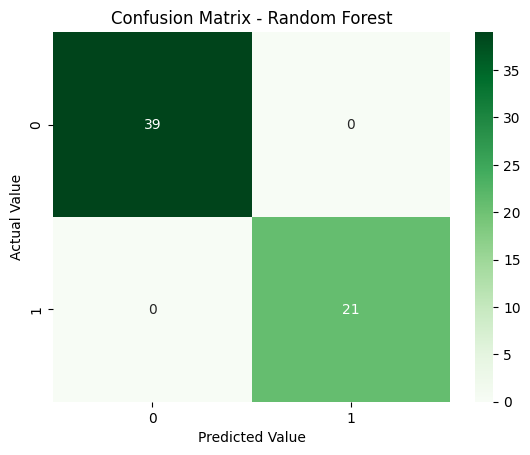


Feature Importances according to Random Forest:
                          importance
sex                         0.672281
smoking                     0.083761
platelets                   0.045035
ejection_fraction           0.039336
age                         0.033895
time                        0.027253
serum_sodium                0.027168
creatinine_phosphokinase    0.023991
serum_creatinine            0.023412
high_blood_pressure         0.011675
diabetes                    0.007574
anaemia                     0.004619


In [22]:

# Classification task to predict 'target' using Random Forest
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_kmeans, test_size=0.2, random_state=42, stratify=y_kmeans
)

# Model Training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train.ravel())

# Prediction and Evaluation
y_pred_rf = rf_clf.predict(X_test)

# Print the results
print("\n--- Random Forest ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# Analysis of Feature Importances
feature_importances = pd.DataFrame(
    rf_clf.feature_importances_,
    index = X_original.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

print("\nFeature Importances according to Random Forest:")
print(feature_importances)